<a href="https://colab.research.google.com/github/MFaiqKhan/100_days_of_ML/blob/main/RandomForest_SciKit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- RF works on Labeled target variable aka supervised machine learning models
- RF is used for both regression and classification problems.

## Using Bank Marketing Dataset 
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

[Source of Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.model_selection import RandomizedSearchCV, train_test_split


import **pandas** as pd: This line imports the pandas library and gives it an alias of "pd". Pandas is a powerful Python library for data manipulation and analysis.

import **numpy** as np: This line imports the NumPy library and gives it an alias of "np". NumPy is another popular Python library for numerical computing.

from **scipy.stats** import **randint**: This line imports the "randint" function from the "stats" module of the SciPy library. SciPy is a Python library for scientific computing that includes many useful functions and tools for statistical analysis.

from **sklearn**.**ensemble** import **RandomForestClassifier**: This line imports the "RandomForestClassifier" class from the "ensemble" module of the scikit-learn (sklearn) library. Scikit-learn is a Python library for machine learning that includes a wide range of classification, regression, clustering, and other algorithms.

from **sklearn**.**metrics** import **accuracy_score**, **confusion_matrix**, **precision_score**, **recall_score**, **ConfusionMatrixDisplay**: This line imports several functions and classes from the "metrics" module of the scikit-learn library. These functions and classes are used for evaluating the performance of machine learning models.

from **sklearn**.**tree** import **export_graphviz**: This line imports the "export_graphviz" function from the "tree" module of the scikit-learn library. This function is used to export a decision tree in Graphviz format.

from **IPython**.**display** import **Image**: This line imports the "Image" class from the "display" module of the IPython library. This class is used to display images in a Jupyter notebook or other IPython environment.

import **graphviz**: This line imports the Graphviz library, which is used to visualize decision trees in the DOT language.

from **sklearn**.**model_selection** import **RandomizedSearchCV**, **train_test_split**: This line imports the "RandomizedSearchCV" class and the "train_test_split" function from the "model_selection" module of the scikit-learn library. The "RandomizedSearchCV" class is used to perform a randomized hyperparameter search for a machine learning model, while the "train_test_split" function is used to split a dataset into training and testing sets for model evaluation.


---



***RandomizedSearchCV*** is a function from the scikit-learn library in Python that performs hyperparameter tuning for machine learning models. Hyperparameters are parameters that are set before the training process begins and are not learned from the data. They have a significant impact on the performance of the model. 

RandomizedSearchCV is a type of cross-validation that allows us to select the best hyperparameters from a large range of values. It works by randomly selecting combinations of hyperparameters from a specified range and evaluating the model's performance using a specified evaluation metric. It repeats this process for a specified number of iterations and returns the best set of hyperparameters found during the search.

In the provided code, RandomizedSearchCV is used to find the best hyperparameters for a RandomForestClassifier. The hyperparameters that will be tuned are n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf, and bootstrap. The ranges of values for each hyperparameter are specified in the hyperparameter grid. The evaluation metric used to measure the model's performance is accuracy_score.

RandomizedSearchCV will perform a specified number of iterations, each time selecting random combinations of hyperparameters from the hyperparameter grid. For each combination, it will train a RandomForestClassifier and evaluate its performance using the accuracy_score metric. The best set of hyperparameters that result in the highest accuracy score will be returned by RandomizedSearchCV.

The train_test_split function is used to split the data into training and testing sets, and then the RandomForestClassifier is trained on the training set using the best hyperparameters found by RandomizedSearchCV. The performance of the final model is evaluated using various evaluation metrics such as accuracy_score, precision_score, recall_score, and confusion_matrix.


---



## Tree Based models are robust to outliers

Tree Based Models are robust to outliers than regression models as they make splits on the data based on values that minimize the impurity or increase the information gain. Outliers typically have values that are significantly different from the rest of the data, and the decision tree algorithms can easily detect them and make appropriate splits to separate them from the rest of the data. As a result, outliers have a minimal impact on the final predictions made by tree-based models.

On the other hand, regression models try to fit a line or curve to the data that minimizes the errors between the predicted and actual values. Outliers can significantly influence the parameters of the model, resulting in a significant deviation from the expected behavior of the data. This can lead to overfitting, which means that the model performs well on the training data but poorly on the test data.

However, it is important to note that tree-based models can still be affected by outliers in certain cases, such as when there are too many outliers, or the outliers are clustered together, leading to a biased splitting of the data. In such cases, it is important to preprocess the data and remove or transform the outliers before fitting the model to achieve better performance.

---



## The Columns we will use from Dataset are :


*   age: The age of the person who received the phone call
*   default: Whether the person has credit in default
*   cons.price.idx: Consumer price index score at the time of the call
*   cons.conf.idx: Consumer confidence index score at the time of the call
*   y: Whether the person subscribed (this is what we’re trying to predict)





In [2]:
bank_data = pd.read_csv("bank-marketing.csv", sep=";") 
bank_data = bank_data.loc[:,['age','default','cons.price.idx','cons.conf.idx','y']]
bank_data.head(5)

# The sep=";" argument specifies that the file is separated by semicolons.
#.loc[] is used to access group of rows and columns by labels here.
# df.loc[row_labels,column_labels]
#.loc[:.['age',..]] # selecting all rows and specific columns by labels

,age,default,cons.price.idx,cons.conf.idx,y
0,56,no,93.994,-36.4,no
1,57,unknown,93.994,-36.4,no
2,37,no,93.994,-36.4,no
3,40,no,93.994,-36.4,no
4,56,no,93.994,-36.4,no


In [3]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

# converting categorical variables 'default' and 'y' into 
# numerical variables by mapping their values to integers.
# the 'default' column is mapped to 0 if the value is 'no' or 'unknown', and 1 if the value is 'yes'.
# 'y' column is mapped to 0 if the value is 'no' and 1 if the value is 'yes'. 



In [4]:
bank_data.head(5)

,age,default,cons.price.idx,cons.conf.idx,y
0,56,0,93.994,-36.4,0
1,57,0,93.994,-36.4,0
2,37,0,93.994,-36.4,0
3,40,0,93.994,-36.4,0
4,56,0,93.994,-36.4,0


In [5]:
# Splitting the data into features (X) as independent variables
# and target (y) as dependent variable.
X = bank_data.drop(['y'], axis='columns')
y = bank_data['y']

# splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [6]:
len(X_train), len(X_test), len(y_train), len(y_test)

(32950, 8238, 32950, 8238)

In [7]:
# Create an instance of the model classifier with default params.
# fitting the model

rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [8]:
# evaluating accuracy of the model
rf.score(X_test,y_test)

0.8928137897547949

In [9]:
y_pred = rf.predict(X_test)

In [10]:
# evaluating accuracy of the model using accuracy_score
accuracy = accuracy_score(y_test,y_pred) # (truth values, predicted values)
accuracy

0.8928137897547949

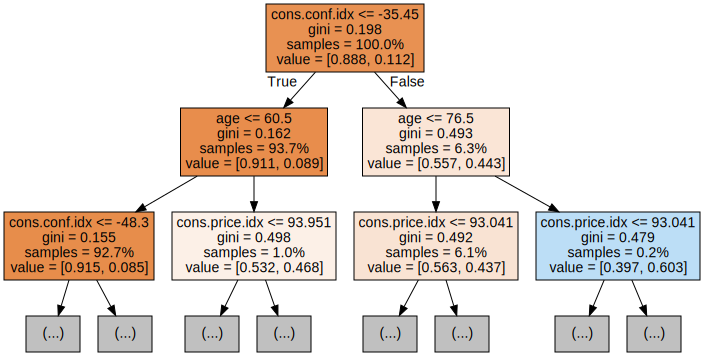

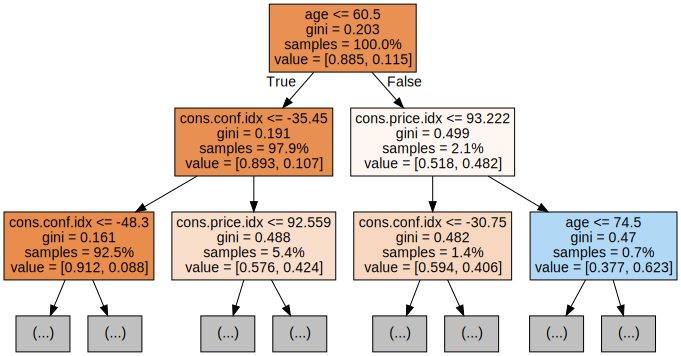

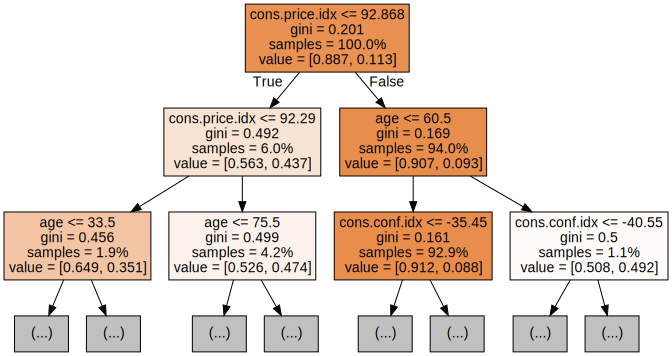

In [11]:
# Visualizing decision tree using graphviz
# exports first three decision trees from a trained rfc

for i in range(3):
  tree = rf.estimators_[i]
  dot_data = export_graphviz(tree,
                             feature_names=X_train.columns,
                             filled=True,
                             max_depth=2,
                             impurity=True,
                             proportion=True)
  graph = graphviz.Source(dot_data)
  display(graph)


This code exports the first three decision trees from a trained random forest classifier (stored in the variable rf) as graphs using the export_graphviz function from the sklearn.tree module and the graphviz library.

The for loop iterates over the first three trees (estimators_ attribute) in the rf classifier. For each tree, the code creates a dot_data object by calling export_graphviz with the following arguments:

tree: The decision tree to export.

feature_names: The names of the features used to train the tree.

filled: Whether to fill the tree nodes with colors.

max_depth: The maximum depth of the tree to display.

impurity: Whether to show the impurity at each node.

proportion: Whether to show the proportion of samples at each node.

Once the dot_data object is created, it is passed to the graphviz.Source constructor to create a graph object, which is then displayed using the display function. The resulting graph shows the decision tree with its nodes and edges, the feature used to split each node, the criterion used to split each node, and the number of samples and class distribution at each node.

Each tree image is limited to only showing the first few nodes. These trees can get very large and difficult to visualize. The colors represent the majority class of each node (box, with red indicating majority 0 (no subscription) and blue indicating majority 1 (subscription). The colors get darker the closer the node gets to being fully 0 or 1. Each node also contains the following information:

1. The variable name and value used for splitting
2. The % of total samples in each split
3. The % split between classes in each split

In [12]:
param_dist = {'n_estimators':randint(50,500),'max_depth':randint(1,20)}
rf = RandomForestClassifier()

random_search = RandomizedSearchCV(rf,param_distributions = param_dist, n_iter=5, cv=5)
# This function also uses cross validation, which means it splits the data into 
# five equal-sized groups and uses 4 to train and 1 to test the result. 
# It will loop through each group and give an accuracy score, which is averaged to find the best model.

random_search.fit(X_train,y_train)



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa63dca71f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa63dc93c70>})

param_dist is a Python dictionary containing the hyperparameters that we want to tune for the Random Forest Classifier model. In this case, we have two hyperparameters:

n_estimators: The number of trees in the forest.
max_depth: The maximum depth of the tree.
The values for these hyperparameters will be randomly sampled from a uniform distribution between the given ranges using the randint function from the scipy.stats module. For example, randint(50, 500) means that the number of trees (n_estimators) will be randomly sampled from the range of integers between 50 and 500. Similarly, randint(1, 20) means that the maximum depth of the tree (max_depth) will be randomly sampled from the range of integers between 1 and 20.

---



RandomizedSearchCV is a function from scikit-learn library which performs a randomized search over a hyperparameter space for a specified estimator. It takes several arguments including the estimator (model) to be optimized, the hyperparameter space to explore (in this case defined by the param_dist dictionary), the number of iterations to perform (specified by n_iter), and the number of cross-validation folds to use (specified by cv).

here it is being used to find the best hyperparameters for a random forest 
classifier (rf). The hyperparameter space being explored includes n_estimators and max_depth, which are both continuous variables defined by the randint function. n_iter specifies that the random search will be performed five times, and cv specifies that five-fold cross-validation will be used. The rand_search object returned by RandomizedSearchCV can then be used to fit the model and make prediction


---



In [13]:
best_model_from_iter = random_search.best_estimator_
# will train many models (defined by n_iter_ and save each one as variables, 
# the code below creates a variable for the best model and prints the hyperparameters.
print('Best hyperparameters:',  random_search.best_params_)


Best hyperparameters: {'max_depth': 5, 'n_estimators': 290}


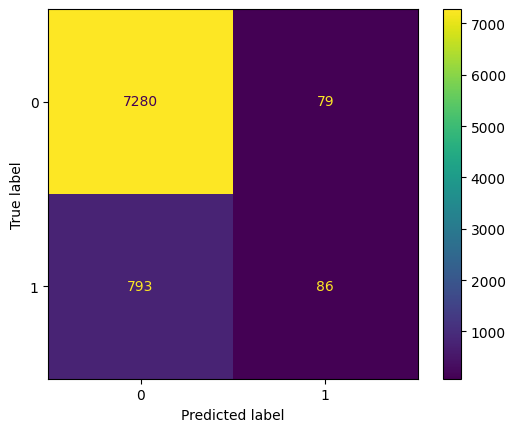

In [14]:
# Confusion Matrix using best model

y_pred = best_model_from_iter.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

7280 samples correctly classified as 0, 79 samples incorrectly classified as 1 when they were 0, 793 samples incorrectly as 0 when they were 1 and 86 samples correctly classified as 1

In [15]:
#                   Predicted 0   Predicted 1
#Actual 0       [[True Negatives   False Positives]
#Actual 1       [False Negatives   True Positives]]

In [16]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8941490653071134

In [17]:
precision = precision_score(y_test, y_pred)
precision

0.5212121212121212

In [18]:
recall = recall_score(y_test, y_pred)
recall

0.09783845278725825

<Axes: >

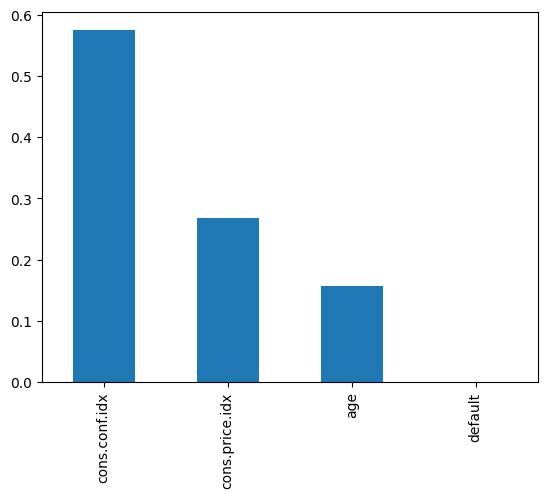

In [19]:


feat_imp = pd.Series(best_model_from_iter.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_imp.plot.bar()

Feature importance is an important concept in machine learning which helps to understand the relative importance of each feature or predictor variable in a model. By understanding feature importance, we can identify the most important features that contribute most to the outcome or target variable, and also identify the less important features that can be potentially removed to simplify the model and reduce overfitting.

here,
The feature importance of the best model selected by the RandomizedSearchCV is calculated and plotted as a bar chart using pandas. The feature importance scores are sorted in descending order and plotted against the corresponding feature names. This plot helps to visualize the relative importance of each feature in the model and can help us to identify the most important features that should be focused on while building the model or performing further analysis.

In [20]:
corr_matrix = np.corrcoef(X.T)
corr_matrix

array([[ 1.00000000e+00,  1.89126251e-03,  8.56714971e-04,
         1.29371614e-01],
       [ 1.89126251e-03,  1.00000000e+00, -3.14060060e-03,
         4.49210495e-03],
       [ 8.56714971e-04, -3.14060060e-03,  1.00000000e+00,
         5.89861817e-02],
       [ 1.29371614e-01,  4.49210495e-03,  5.89861817e-02,
         1.00000000e+00]])

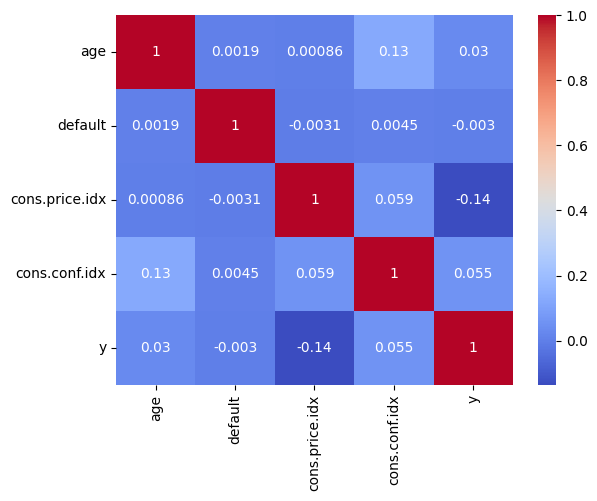

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = bank_data.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

The above matrix is a heatmap representation of a correlation matrix. A correlation matrix is a table showing the correlation coefficients between a set of variables. In this case, the variables are the columns of the original dataset, which have been preprocessed and included in the correlation matrix.

The correlation matrix is symmetric along the diagonal, as the correlation between each variable and itself is always 1. The color of each cell in the heatmap indicates the strength of the correlation between the variables. Darker colors indicate a stronger correlation, while lighter colors indicate a weaker correlation.

The values on the diagonal represent the correlation of each variable with itself, which is always 1. The values below the diagonal represent the correlation between each pair of variables, while the values above the diagonal are identical to those below, due to the symmetry of the matrix.

The visualization of a correlation matrix can be useful to quickly identify which variables are strongly correlated with each other, which can help in feature selection or in identifying potential multicollinearity issues in a regression analysis.

# [Tutorial on Datacamp](https://www.datacamp.com/tutorial/random-forests-classifier-python)